In [1]:
#Dataset Information

        # CRIM     per capita crime rate by town
        # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        # INDUS    proportion of non-retail business acres per town
        # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        # NOX      nitric oxides concentration (parts per 10 million)
        # RM       average number of rooms per dwelling
        # AGE      proportion of owner-occupied units built prior to 1940
        # DIS      weighted distances to five Boston employment centres
        # RAD      index of accessibility to radial highways
        # TAX      full-value property-tax rate per $10,000
        # PTRATIO  pupil-teacher ratio by town
        # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        # LSTAT    % lower status of the population
        # MEDV     Median value of owner-occupied homes in $1000's

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO 
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/boston_house_project.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.rename({'MEDV':'PRICE'},axis=1,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#Preprocessing

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
df["CRIM"] = df["CRIM"].apply(np.int64)
df["ZN"] = df["ZN"].apply(np.int64)
df["INDUS"] = df["INDUS"].apply(np.int64)
df["NOX"] = df["NOX"].apply(np.int64)
df["RM"] = df["RM"].apply(np.int64)
df["AGE"] = df["AGE"].apply(np.int64)
df["DIS"] = df["DIS"].apply(np.int64)
df["AGE"] = df["AGE"].apply(np.int64)
df["AGE"] = df["AGE"].apply(np.int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    int64  
 1   ZN       506 non-null    int64  
 2   INDUS    506 non-null    int64  
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    int64  
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    int64  
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 55.5 KB


Exploratory Data Analysis

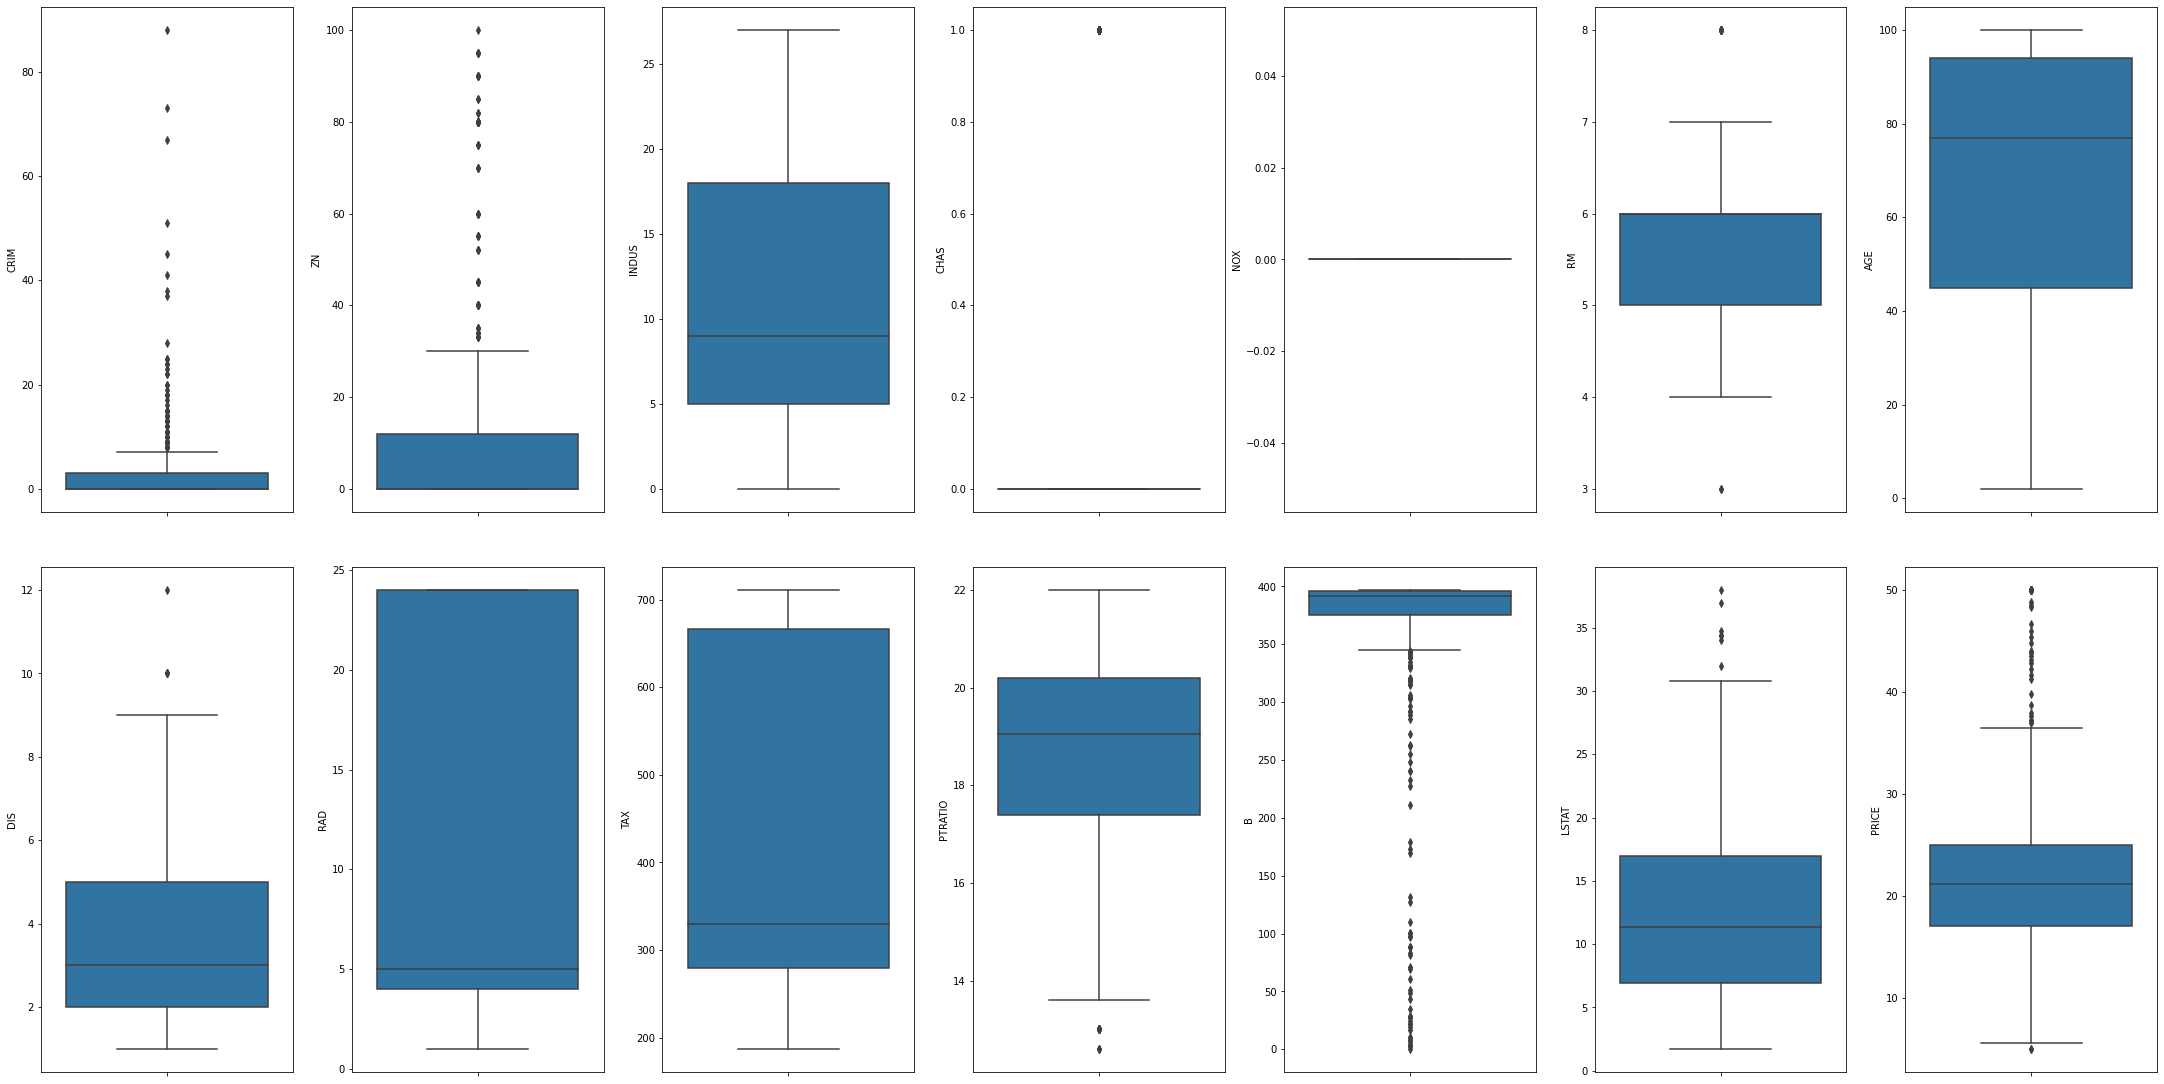

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

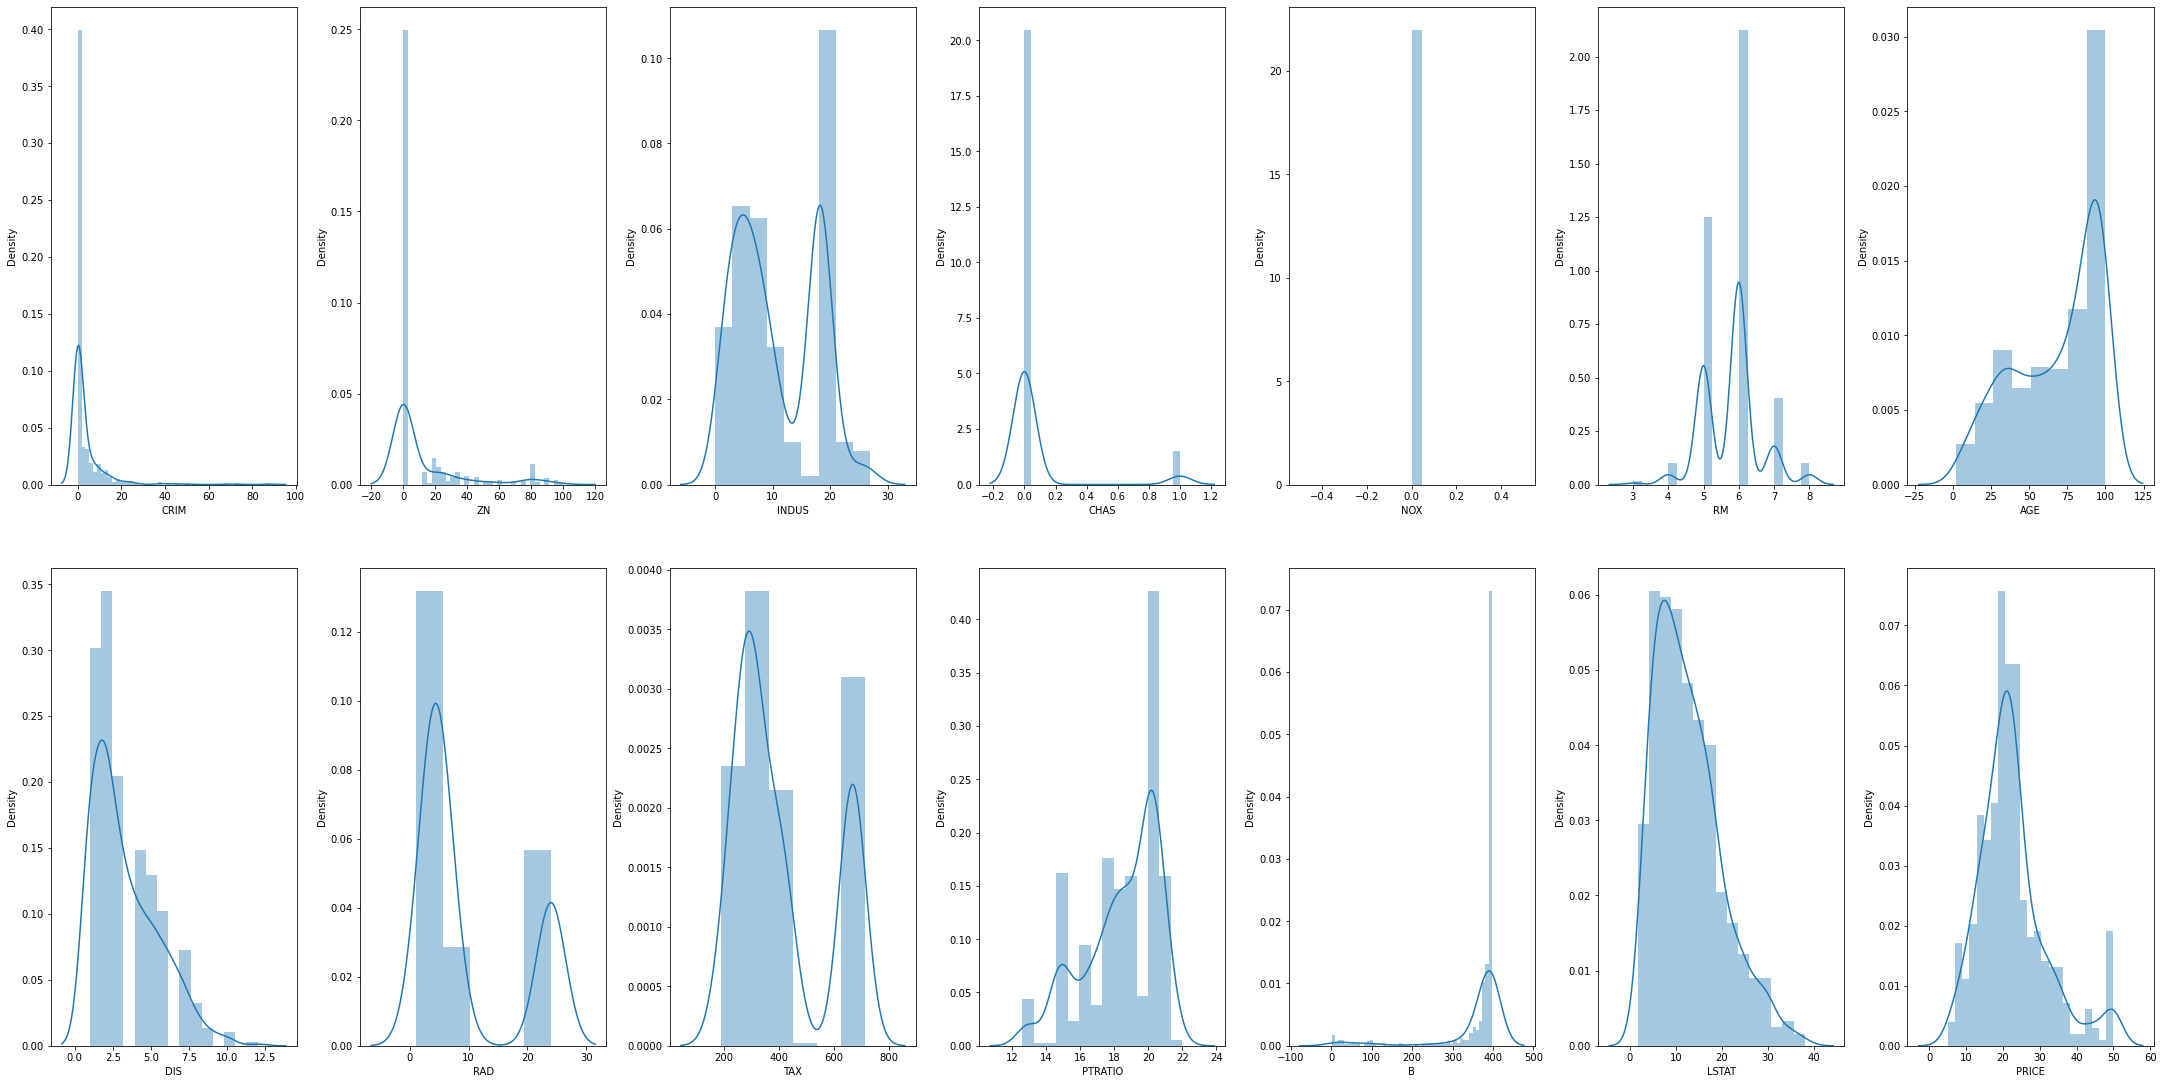

In [10]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Min-Max Normalization

In [11]:
cols = ['CRIM', 'ZN', 'TAX','B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

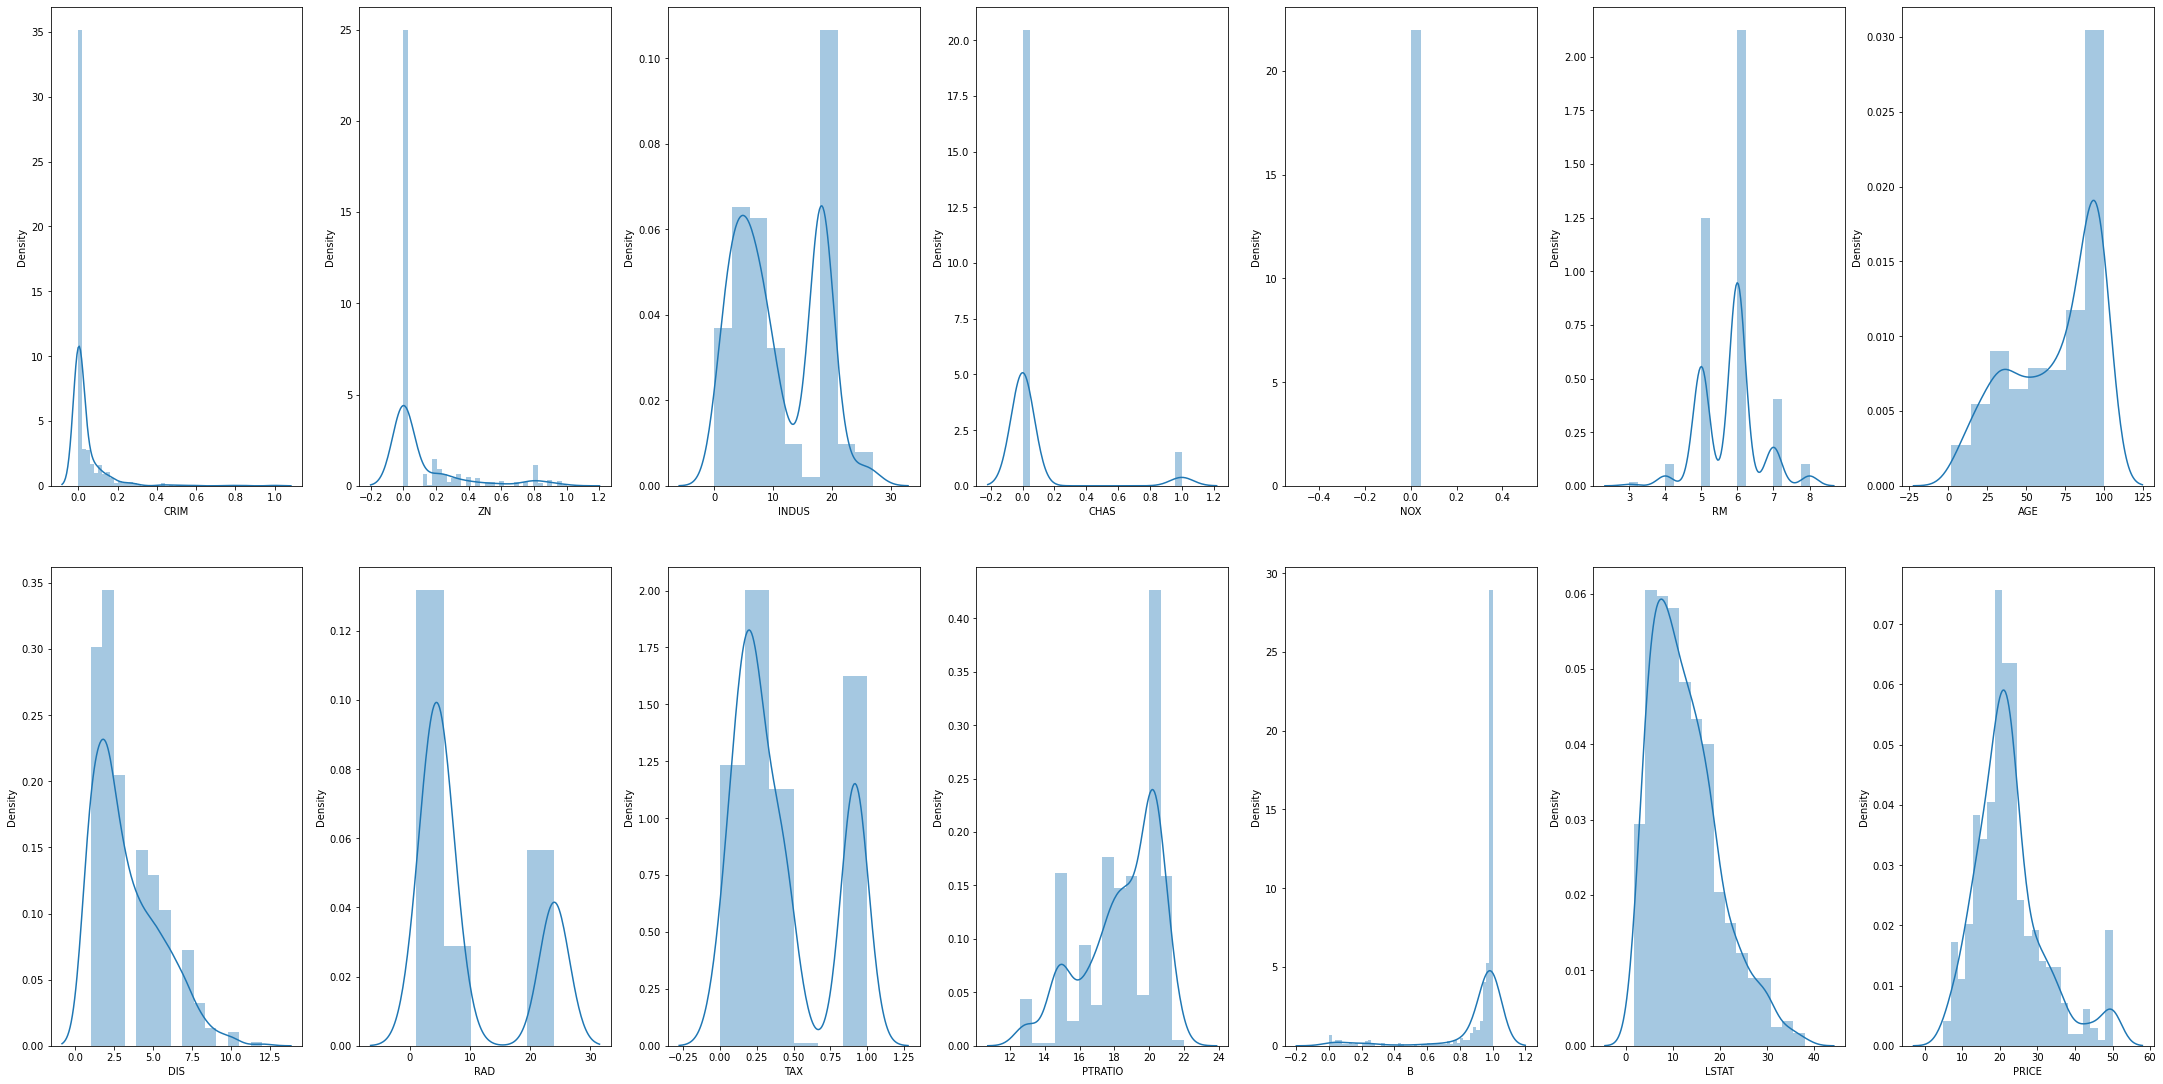

In [12]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

standardization

In [13]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.390383,0.285654,-0.666608,0.441052
1,-0.390383,-0.487292,-0.987329,0.441052
2,-0.390383,-0.487292,-0.987329,0.396427
3,-0.390383,-0.487292,-1.106115,0.416163
4,-0.390383,-0.487292,-1.106115,0.441052


In [14]:
for col in cols:
    df[col] = scaled_cols[col]

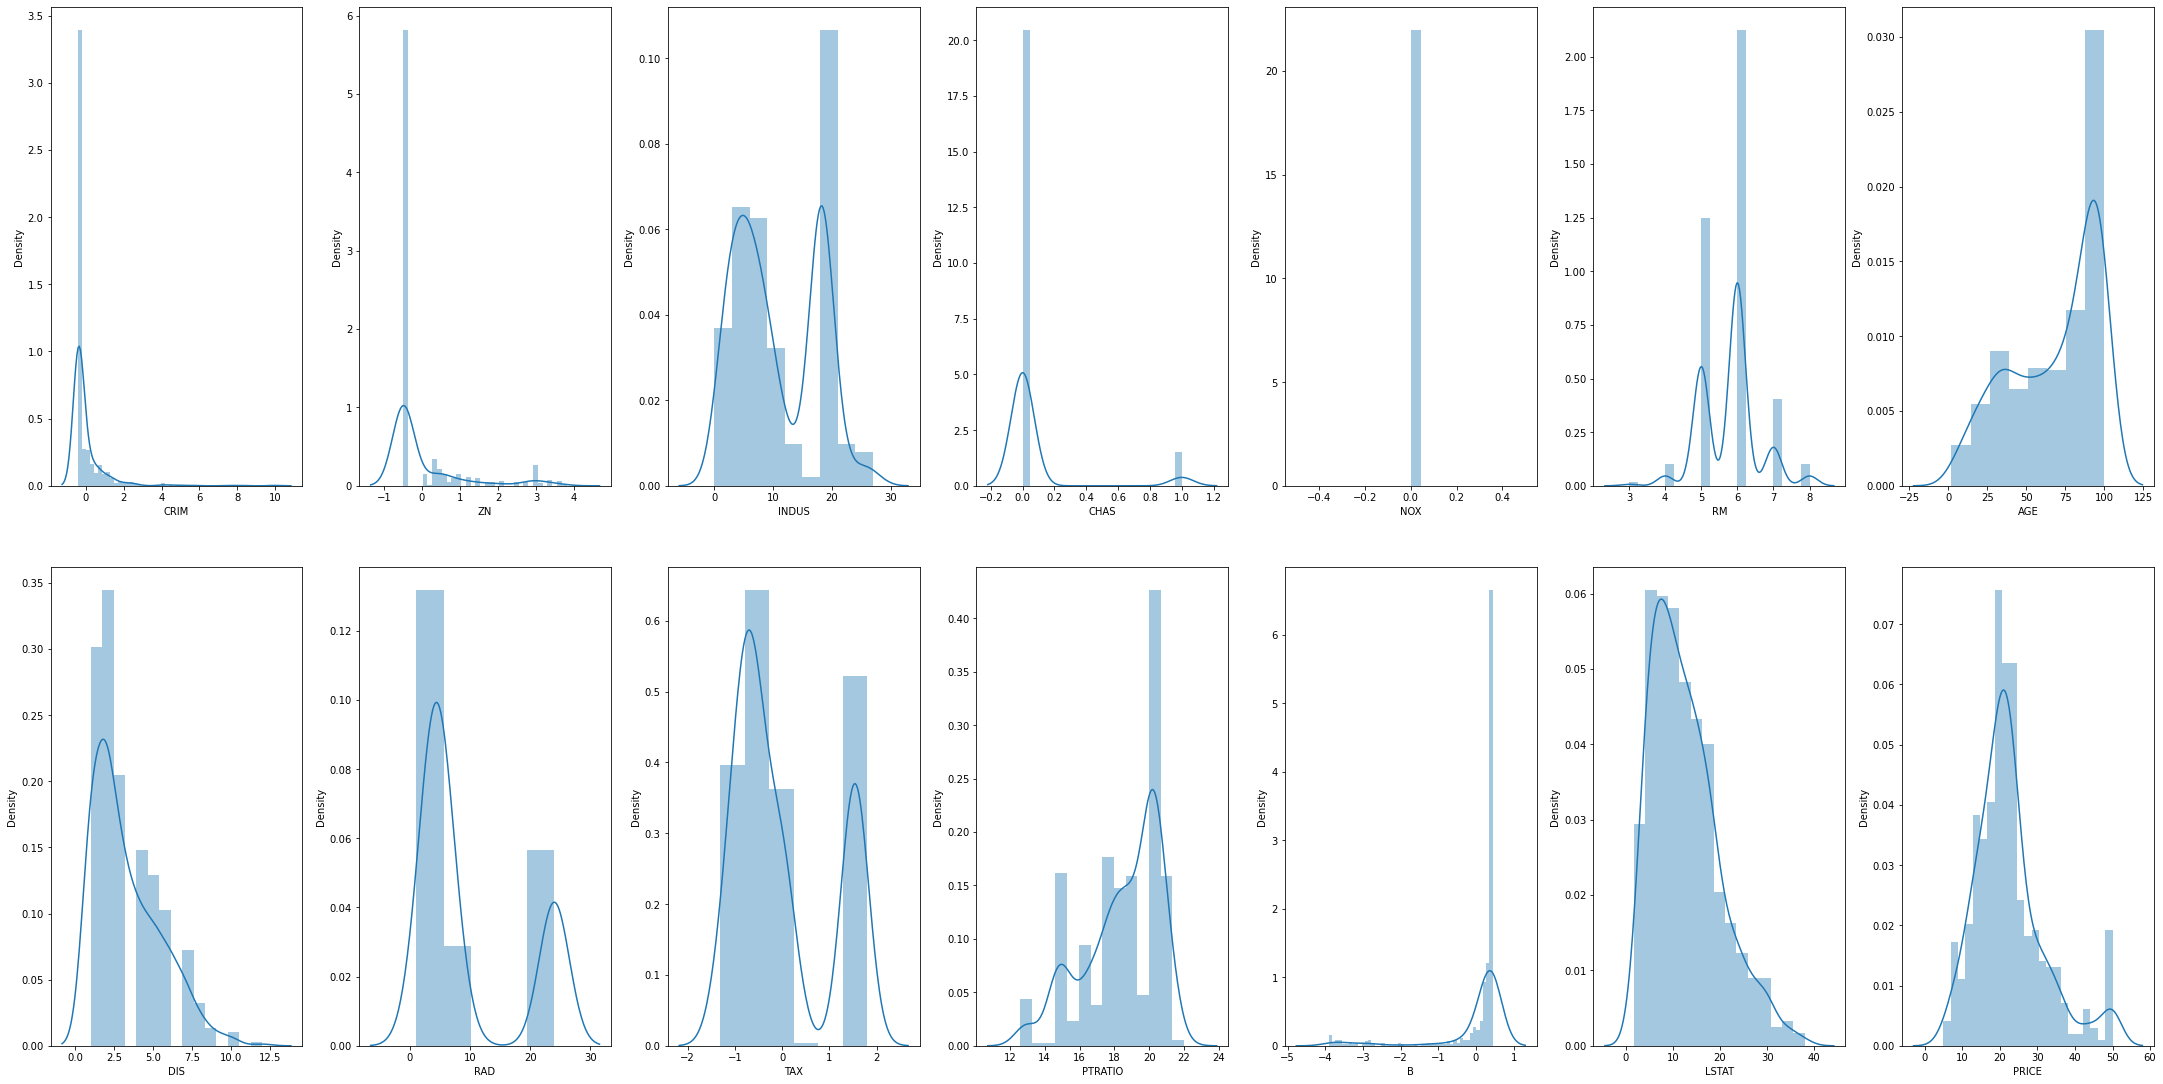

In [15]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Coorelation Matrix

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

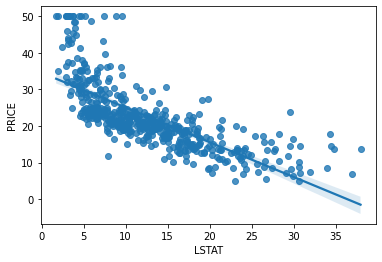

In [16]:
sns.regplot(y=df['PRICE'], x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

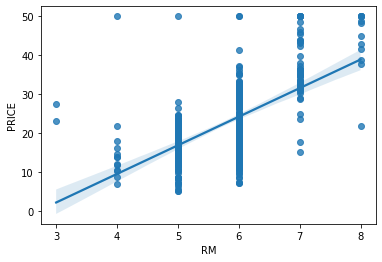

In [17]:
sns.regplot(y=df['PRICE'], x=df['RM'])

Split Input 

In [18]:
X = df.drop(columns=['PRICE', 'RAD'], axis=1)
y = df['PRICE']

Training Model

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 25.64492508178471
CV Score: 34.0112559969484


<AxesSubplot:title={'center':'Model Coefficients'}>

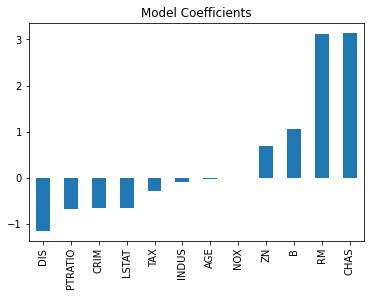

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 22.990551181102365
CV Score: 45.28841545331004


<AxesSubplot:title={'center':'Feature Importance'}>

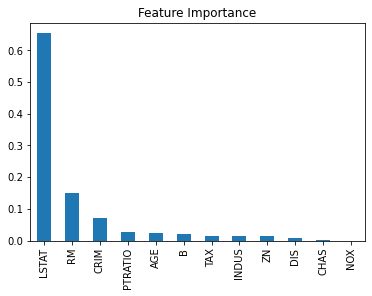

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 15.582407590551162
CV Score: 24.158788616521065


<AxesSubplot:title={'center':'Feature Importance'}>

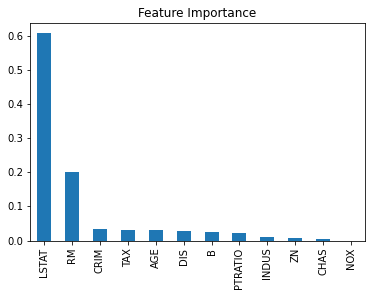

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(['PRICE'],axis='columns')
y=df['PRICE']

In [27]:
x.shape

(506, 13)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
model.fit(x,y)

LinearRegression()

In [30]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
230,-0.390383,-0.487292,6,0,0,5,68,3,8,-0.601276,17.4,0.237663,11.65
436,1.257693,-0.487292,18,0,0,6,93,2,24,1.530926,20.2,-3.609292,18.05
79,-0.390383,-0.487292,12,0,0,5,36,4,5,-0.060801,18.7,0.431842,9.10
362,-0.037224,-0.487292,18,0,0,5,96,2,24,1.530926,20.2,0.264416,10.19
447,0.669094,-0.487292,18,0,0,6,96,2,24,1.530926,20.2,0.349171,16.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.904534,-0.487292,18,0,0,6,94,2,24,1.530926,20.2,-2.706267,23.27
255,-0.390383,2.948021,3,0,0,5,19,9,1,-0.553762,16.4,0.422193,9.25
279,-0.390383,0.371537,3,0,0,6,32,4,5,-1.141751,14.9,0.441052,4.85
183,-0.390383,-0.487292,2,0,0,6,95,2,3,-1.278354,17.8,0.441052,5.68


In [31]:
y_test

230    24.3
436     9.6
79     20.3
362    20.8
447    12.6
       ... 
435    13.4
255    20.9
279    35.1
183    32.5
78     21.2
Name: PRICE, Length: 102, dtype: float64

In [32]:
model.score(x_test,y_test)

0.7414046144298271

DECISION TREE

# Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [42]:
x= df.iloc[:,[-1,5,10,4,9]]
y= df.iloc[:,[-1]]


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

y_pred=reg.predict(x_train)
reg.score(x_train,y_train)


0.9772608372472734